In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('../Datasets/Regression_Data/Train.csv')
train_data=train_data.values
print(train_data.shape)
x=train_data[:,0:5]
x1=np.ones((x.shape[0],))
print(x.shape,x1.shape)
x=np.column_stack((x1,x))
print(x[0])
y=train_data[:,-1]
print(x.shape)
print(y.shape)

(1600, 6)
(1600, 5) (1600,)
[ 1.          0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
(1600, 6)
(1600,)


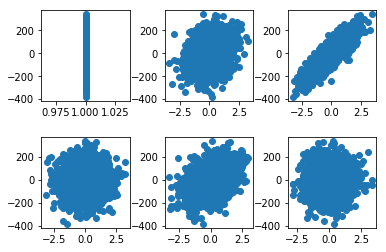

In [3]:
fig=plt.figure()
m=x.shape[1]
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,m+1):
    ax=fig.add_subplot(2,3,i)
    ax.scatter(x[:,i-1],y)
plt.show()

In [4]:
def hypothesis(x,theta):
    m=x.shape[0]
    ans=0
    for i in range(m):
        ans+=(theta[i]*x[i])
    return ans

def error(X,Y,theta):
    m=X.shape[0]
    err=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        err+=(hx-Y[i])**2
    return err    

def gradient(X,Y,theta):
    n=X.shape[0]
    m=theta.shape[0]
    grad=np.zeros((m,))
    for i in range(n):
        hx=hypothesis(X[i],theta)
        for j in range(m):
            grad[j]+=(Y[i]-hx)*X[i][j]        
    return grad        
    

In [5]:
def gradientDescent(X,Y,learning_rate=0.001,max_itr=100):
    m=X.shape[1]
    theta=np.zeros((m,))
    itr=0
    error_list=[]
    theta_list=[]
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        err=error(X,Y,theta)
        error_list.append(err)
        theta_list.append(theta) 
        for i in range(m):
            theta[i]=theta[i]+learning_rate*grad[i]
        itr+=1
    return theta,error_list,theta_list      

In [8]:
final_theta,error_list,theta_list=gradientDescent(x,y,0.0001)
print(final_theta)

[ 4.99096327 29.68186937 92.66247503  8.28061685 44.76773276  2.51915835]


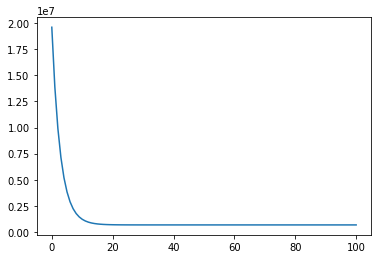

In [9]:
plt.plot(error_list)
plt.show()